The Deutsch-Jozsa code is immplemented from qiskit textbook. In this code, it will randomly choose the oracle be constant or balance. If the outcome is all zero, the oracle is constant, otherwise, it is balance. Therefore, Deutsch-Jozsa code compute the OR of the measurement outcome.

In [117]:
from qiskit import QuantumCircuit
import numpy as np


def dj_function(num_qubits):
    """
    Create a random Deutsch-Jozsa function.
    """

    qc = QuantumCircuit(num_qubits + 1)
    if np.random.randint(0, 2):
        # Flip output qubit with 50% chance
        qc.x(num_qubits)
    if np.random.randint(0, 2):
        # return constant circuit with 50% chance
        return qc

    # next, choose half the possible input states
    on_states = np.random.choice(
        range(2**num_qubits),  # numbers to sample from
        2**num_qubits // 2,  # number of samples
        replace=False,  # makes sure states are only sampled once
    )

    def add_cx(qc, bit_string):
        for qubit, bit in enumerate(reversed(bit_string)):
            if bit == "1":
                qc.x(qubit)
        return qc

    for state in on_states:
        qc.barrier()  # Barriers are added to help visualize how the functions are created. They can safely be removed.
        qc = add_cx(qc, f"{state:0b}")
        qc.mct(list(range(num_qubits)), num_qubits)
        qc = add_cx(qc, f"{state:0b}")

    qc.barrier()

    return qc

In [118]:
dj_function(3).draw()

C:\Users\Tim\AppData\Local\Temp\ipykernel_5748\214573757.py:34: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.mct()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use QuantumCircuit.mcx as direct replacement.
  qc.mct(list(range(num_qubits)), num_qubits)


░                 ░ ┌───┐     ┌───┐ ░ ┌───┐     ┌───┐ ░ ┌───┐     ┌───┐»
q_0: ─░────────■────────░─┤ X ├──■──┤ X ├─░─┤ X ├──■──┤ X ├─░─┤ X ├──■──┤ X ├»
      ░        │        ░ ├───┤  │  ├───┤ ░ ├───┤  │  ├───┤ ░ └───┘  │  └───┘»
q_1: ─░────────■────────░─┤ X ├──■──┤ X ├─░─┤ X ├──■──┤ X ├─░────────■───────»
      ░ ┌───┐  │  ┌───┐ ░ ├───┤  │  ├───┤ ░ └───┘  │  └───┘ ░        │       »
q_2: ─░─┤ X ├──■──┤ X ├─░─┤ X ├──■──┤ X ├─░────────■────────░────────■───────»
      ░ └───┘┌─┴─┐└───┘ ░ └───┘┌─┴─┐└───┘ ░      ┌─┴─┐      ░      ┌─┴─┐     »
q_3: ─░──────┤ X ├──────░──────┤ X ├──────░──────┤ X ├──────░──────┤ X ├─────»
      ░      └───┘      ░      └───┘      ░      └───┘      ░      └───┘     »
«      ░ 
«q_0: ─░─
«      ░ 
«q_1: ─░─
«      ░ 
«q_2: ─░─
«      ░ 
«q_3: ─░─
«      ░

In [119]:
def compile_circuit(function: QuantumCircuit):
    """
    Compiles a circuit for use in the Deutsch-Jozsa algorithm.
    """
    n = function.num_qubits - 1
    qc = QuantumCircuit(n + 1, n)
    qc.x(n)
    qc.h(range(n + 1))
    qc.compose(function, inplace=True)
    qc.h(range(n))
    qc.measure(range(n), range(n))
    return qc

In [120]:
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

def dj_algorithm(function: QuantumCircuit):
    """
    Determine if a Deutsch-Jozsa function is constant or balanced.
    """
    qc = compile_circuit(function)

    result = AerSimulator().run(qc, shots=1, memory=True).result()
    measurements = result.get_memory()
    
    if "1" in measurements[0]:
        return "balanced"
    return "constant"

constant


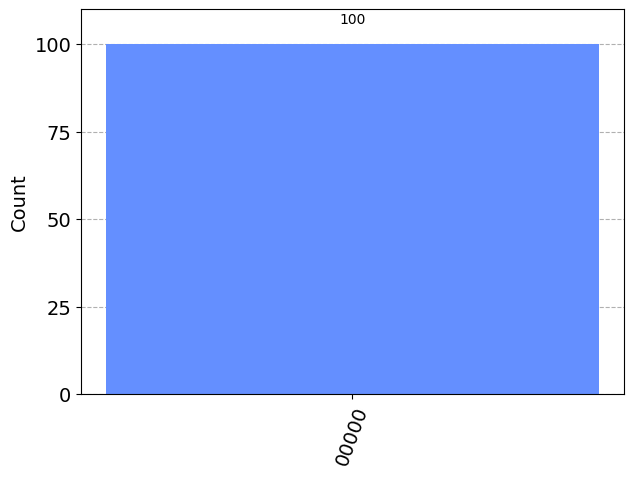

In [143]:
f = dj_function(5)
qc = compile_circuit(f)

result = AerSimulator().run(qc, shots=100, memory=True).result()
measurements = result.get_memory()

if "1" in measurements[0]:
    print("balanced")
else:
    print("constant")
plot_histogram(result.get_counts())

In [133]:
f = dj_function(5)
display(f.draw())
dj_algorithm(f)

C:\Users\Tim\AppData\Local\Temp\ipykernel_5748\81683376.py:38: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.mct()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use QuantumCircuit.mcx as direct replacement.
  qc.mct(list(range(num_qubits)), num_qubits)


░ ┌─────────────────┐┌─────────────────┐                        »
q_0: ─░─┤ Delay(1e-06[s]) ├┤ Delay(1e-06[s]) ├─────────────────────■──»
      ░ ├─────────────────┤├─────────────────┤                     │  »
q_1: ─░─┤ Delay(1e-06[s]) ├┤ Delay(1e-06[s]) ├─────────────────────■──»
      ░ ├─────────────────┤└──────┬───┬──────┘┌─────────────────┐  │  »
q_2: ─░─┤ Delay(1e-06[s]) ├───────┤ X ├───────┤ Delay(1e-06[s]) ├──■──»
      ░ ├─────────────────┤┌──────┴───┴──────┐└─────────────────┘  │  »
q_3: ─░─┤ Delay(1e-06[s]) ├┤ Delay(1e-06[s]) ├─────────────────────■──»
      ░ ├─────────────────┤├─────────────────┤                     │  »
q_4: ─░─┤ Delay(1e-06[s]) ├┤ Delay(1e-06[s]) ├─────────────────────■──»
      ░ ├─────────────────┤├─────────────────┤                   ┌─┴─┐»
q_5: ─░─┤ Delay(1e-06[s]) ├┤ Delay(1e-06[s]) ├───────────────────┤ X ├»
      ░ └─────────────────┘└─────────────────┘                   └───┘»
«     ┌─────────────────┐      ░ ┌─────────────────┐       ┌───┐       »
«q_0: ┤ Delay(1e-06[s]) ├──────░─┤ Delay(1e-06[s]) ├───────┤ X ├───────»
«     ├─────────────────┤      ░ ├─────────────────┤┌──────┴───┴──────┐»
«q_1: ┤ Delay(1e-06[s]) ├──────░─┤ Delay(1e-06[s]) ├┤ Delay(1e-06[s]) ├»
«     ├─────────────────┤┌───┐ ░ ├─────────────────┤└──────┬───┬──────┘»
«q_2: ┤ Delay(1e-06[s]) ├┤ X ├─░─┤ Delay(1e-06[s]) ├───────┤ X ├───────»
«     ├─────────────────┤└───┘ ░ ├─────────────────┤┌──────┴───┴──────┐»
«q_3: ┤ Delay(1e-06[s]) ├──────░─┤ Delay(1e-06[s]) ├┤ Delay(1e-06[s]) ├»
«     ├─────────────────┤      ░ ├─────────────────┤├─────────────────┤»
«q_4: ┤ Delay(1e-06[s]) ├──────░─┤ Delay(1e-06[s]) ├┤ Delay(1e-06[s]) ├»
«     ├─────────────────┤      ░ ├─────────────────┤├─────────────────┤»
«q_5: ┤ Delay(1e-06[s]) ├──────░─┤ Delay(1e-06[s]) ├┤ Delay(1e-06[s]) ├»
«     └─────────────────┘      ░ └─────────────────┘└─────────────────┘»
«     ┌─────────────────┐     ┌─────────────────┐┌───┐ ░ ┌─────────────────┐»
«q_0: ┤ Delay(1e-06[s]) ├──■──┤ Delay(1e-06[s]) ├┤ X ├─░─┤ Delay(1e-06[s]) ├»
«     └─────────────────┘  │  ├─────────────────┤└───┘ ░ ├─────────────────┤»
«q_1: ─────────────────────■──┤ Delay(1e-06[s]) ├──────░─┤ Delay(1e-06[s]) ├»
«     ┌─────────────────┐  │  ├─────────────────┤┌───┐ ░ ├─────────────────┤»
«q_2: ┤ Delay(1e-06[s]) ├──■──┤ Delay(1e-06[s]) ├┤ X ├─░─┤ Delay(1e-06[s]) ├»
«     └─────────────────┘  │  ├─────────────────┤└───┘ ░ ├─────────────────┤»
«q_3: ─────────────────────■──┤ Delay(1e-06[s]) ├──────░─┤ Delay(1e-06[s]) ├»
«                          │  ├─────────────────┤      ░ ├─────────────────┤»
«q_4: ─────────────────────■──┤ Delay(1e-06[s]) ├──────░─┤ Delay(1e-06[s]) ├»
«                        ┌─┴─┐├─────────────────┤      ░ ├─────────────────┤»
«q_5: ───────────────────┤ X ├┤ Delay(1e-06[s]) ├──────░─┤ Delay(1e-06[s]) ├»
«                        └───┘└─────────────────┘      ░ └─────────────────┘»
«            ┌───┐       ┌─────────────────┐     ┌─────────────────┐┌───┐ ░ »
«q_0: ───────┤ X ├───────┤ Delay(1e-06[s]) ├──■──┤ Delay(1e-06[s]) ├┤ X ├─░─»
«     ┌──────┴───┴──────┐└─────────────────┘  │  ├─────────────────┤└───┘ ░ »
«q_1: ┤ Delay(1e-06[s]) ├─────────────────────■──┤ Delay(1e-06[s]) ├──────░─»
«     └──────┬───┬──────┘┌─────────────────┐  │  ├─────────────────┤┌───┐ ░ »
«q_2: ───────┤ X ├───────┤ Delay(1e-06[s]) ├──■──┤ Delay(1e-06[s]) ├┤ X ├─░─»
«            ├───┤       ├─────────────────┤  │  ├─────────────────┤├───┤ ░ »
«q_3: ───────┤ X ├───────┤ Delay(1e-06[s]) ├──■──┤ Delay(1e-06[s]) ├┤ X ├─░─»
«     ┌──────┴───┴──────┐└─────────────────┘  │  ├─────────────────┤└───┘ ░ »
«q_4: ┤ Delay(1e-06[s]) ├─────────────────────■──┤ Delay(1e-06[s]) ├──────░─»
«     ├─────────────────┤                   ┌─┴─┐├─────────────────┤      ░ »
«q_5: ┤ Delay(1e-06[s]) ├───────────────────┤ X ├┤ Delay(1e-06[s]) ├──────░─»
«     └─────────────────┘                   └───┘└─────────────────┘      ░ »
«     ┌─────────────────┐┌─────────────────┐                        »
«q_0: ┤ Delay(1e-06[s])

'balanced'

Deutsch-Jozsa code with noise

In [129]:
from qiskit import QuantumCircuit
import numpy as np


def dj_function(num_qubits):
    """
    Create a random Deutsch-Jozsa function.
    """

    qc = QuantumCircuit(num_qubits + 1)
    if np.random.randint(0, 2):
        # Flip output qubit with 50% chance
        
        qc.x(num_qubits)
        qc.delay(10**-6,unit='s')
    if np.random.randint(0, 2):
        # return constant circuit with 50% chance
        return qc

    # next, choose half the possible input states
    on_states = np.random.choice(
        range(2**num_qubits),  # numbers to sample from
        2**num_qubits // 2,  # number of samples
        replace=False,  # makes sure states are only sampled once
    )

    def add_cx(qc, bit_string):
        for qubit, bit in enumerate(reversed(bit_string)):
            if bit == "1":
                qc.x(qubit)
        return qc

    for state in on_states:
        qc.barrier()  # Barriers are added to help visualize how the functions are created. They can safely be removed.
        qc.delay(10**-6,unit='s')
        qc = add_cx(qc, f"{state:0b}")
        qc.delay(10**-6,unit='s')
        qc.mct(list(range(num_qubits)), num_qubits)
        qc.delay(10**-6,unit='s')
        qc = add_cx(qc, f"{state:0b}")

    qc.barrier()

    return qc

In [144]:
from qiskit.providers.fake_provider import FakeVigo
from qiskit import transpile
from qiskit.providers.fake_provider import FakePerth
from qiskit_aer import Aer
from qiskit_aer.noise import NoiseModel
noise_model = NoiseModel.from_backend(FakePerth(), thermal_relaxation=True, gate_error=True, readout_error=True)
device_backend = FakeVigo()
sim_vigo = AerSimulator.from_backend(FakePerth(),noise_model=noise_model)


p=0
for i in range(0,100):
    f = dj_function(5)
    qc = compile_circuit(f)

    qasm_sim = Aer.get_backend('qasm_simulator')
    transpiled_circuit = transpile(qc, qasm_sim)
    results = qasm_sim.run(transpiled_circuit,memory = True).result()
    counts = results.get_counts()
    measurements = results.get_memory()
    plot_histogram(counts)

    if "1" in measurements[0]:
        print("balanced")
        p+=1
    else:
        print("constant")
# plot_histogram(results.get_counts())
p=p/100

constant


C:\Users\Tim\AppData\Local\Temp\ipykernel_5748\81683376.py:38: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.mct()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use QuantumCircuit.mcx as direct replacement.
  qc.mct(list(range(num_qubits)), num_qubits)


balanced
constant
balanced
constant
constant
balanced
balanced
balanced
constant
constant
balanced
constant
constant
constant
constant
constant
constant
constant
constant
balanced
balanced
balanced
constant
constant
balanced
balanced
constant
balanced
balanced
constant
balanced
balanced
constant
balanced
balanced
constant
balanced
constant
constant
constant
balanced
constant
balanced
balanced
constant
constant
constant
balanced
balanced
constant
constant
constant
balanced
balanced
balanced
constant
balanced
balanced
balanced
constant
balanced
balanced
constant
constant
balanced
balanced
balanced
balanced
constant
constant
balanced
constant
balanced
constant
balanced
constant
balanced
balanced
constant
constant
balanced
constant
constant
constant
constant
balanced
balanced
balanced
constant
balanced
constant
balanced
balanced
constant
constant
constant
constant
constant
balanced


We can see that even with noise, the probability for constant and balance are still the same with the probability we set (50%).